# House Price Prediction Using Advanced Regression Techniques

The solution to this assignment is divided into following sections
1. Exploratory Data Analysis
2. Data Cleaning
3. Data Preparation
4. Model Building and Evaluation

## 1. Exploratory Data Analysis

In [1276]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',150)

In [1277]:
# Specifying the path of the file
path="C:/Users/ssharma/Desktop/UPITB/Assignments/Advanced Regression/"

In [1278]:
# Reading the input data
house_price=pd.read_csv(path+"train.csv", encoding="ISO-8859-1")
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

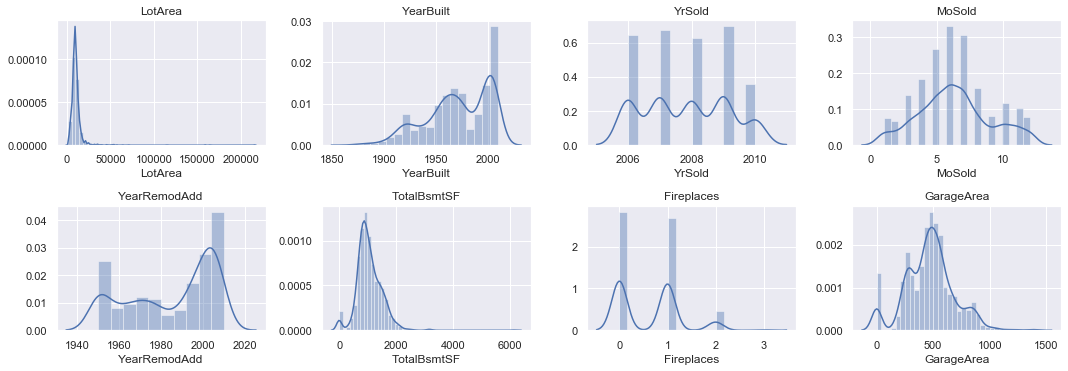

In [1279]:
#Plotting numeric variables for data understanding

sns.set(font_scale=1)
plt.figure(figsize = (15,10))

plt.subplot(4, 4, 1)
plt.title('LotArea')
sns.distplot(house_price['LotArea'])
plt.tight_layout()

plt.subplot(4, 4, 2)
plt.title('YearBuilt')
sns.distplot(house_price['YearBuilt'])
plt.tight_layout()

plt.subplot(4, 4, 3)
plt.title('YrSold')
sns.distplot(house_price['YrSold'])
plt.tight_layout()

plt.subplot(4, 4, 4)
plt.title('MoSold')
sns.distplot(house_price['MoSold'])
plt.tight_layout()

plt.subplot(4, 4, 5)
plt.title('YearRemodAdd')
sns.distplot(house_price['YearRemodAdd'])
plt.tight_layout()

plt.subplot(4, 4, 6)
plt.title('TotalBsmtSF')
sns.distplot(house_price['TotalBsmtSF'])
plt.tight_layout()

plt.subplot(4, 4, 7)
plt.title('Fireplaces')
sns.distplot(house_price['Fireplaces'])
plt.tight_layout()

plt.subplot(4, 4, 8)
plt.title('GarageArea')
sns.distplot(house_price['GarageArea'])
plt.tight_layout()

#### Insights from univariate analysis on numeric data
- There are outliers in LotArea, meaning few houses are exceptionally larger than the others
- Most of the houses are built after year 2000
- Most of the houses were sold in the middle of the year (in the months of June,July)
- Most of the houses have basement area is less than 2000 sq feet
- Most of the houses have 0 or 1 fireplaces
- Most of the houses have garage area of ~500 sq feet

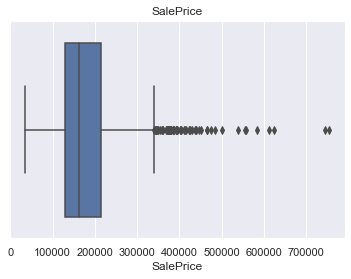

In [1280]:
# Target variable: Sale Price. We observe outliers in SalePrice.
# Some houses are really expensive.These houses would be of special interest for the business

plt.title('SalePrice')
sns.boxplot(house_price['SalePrice'])

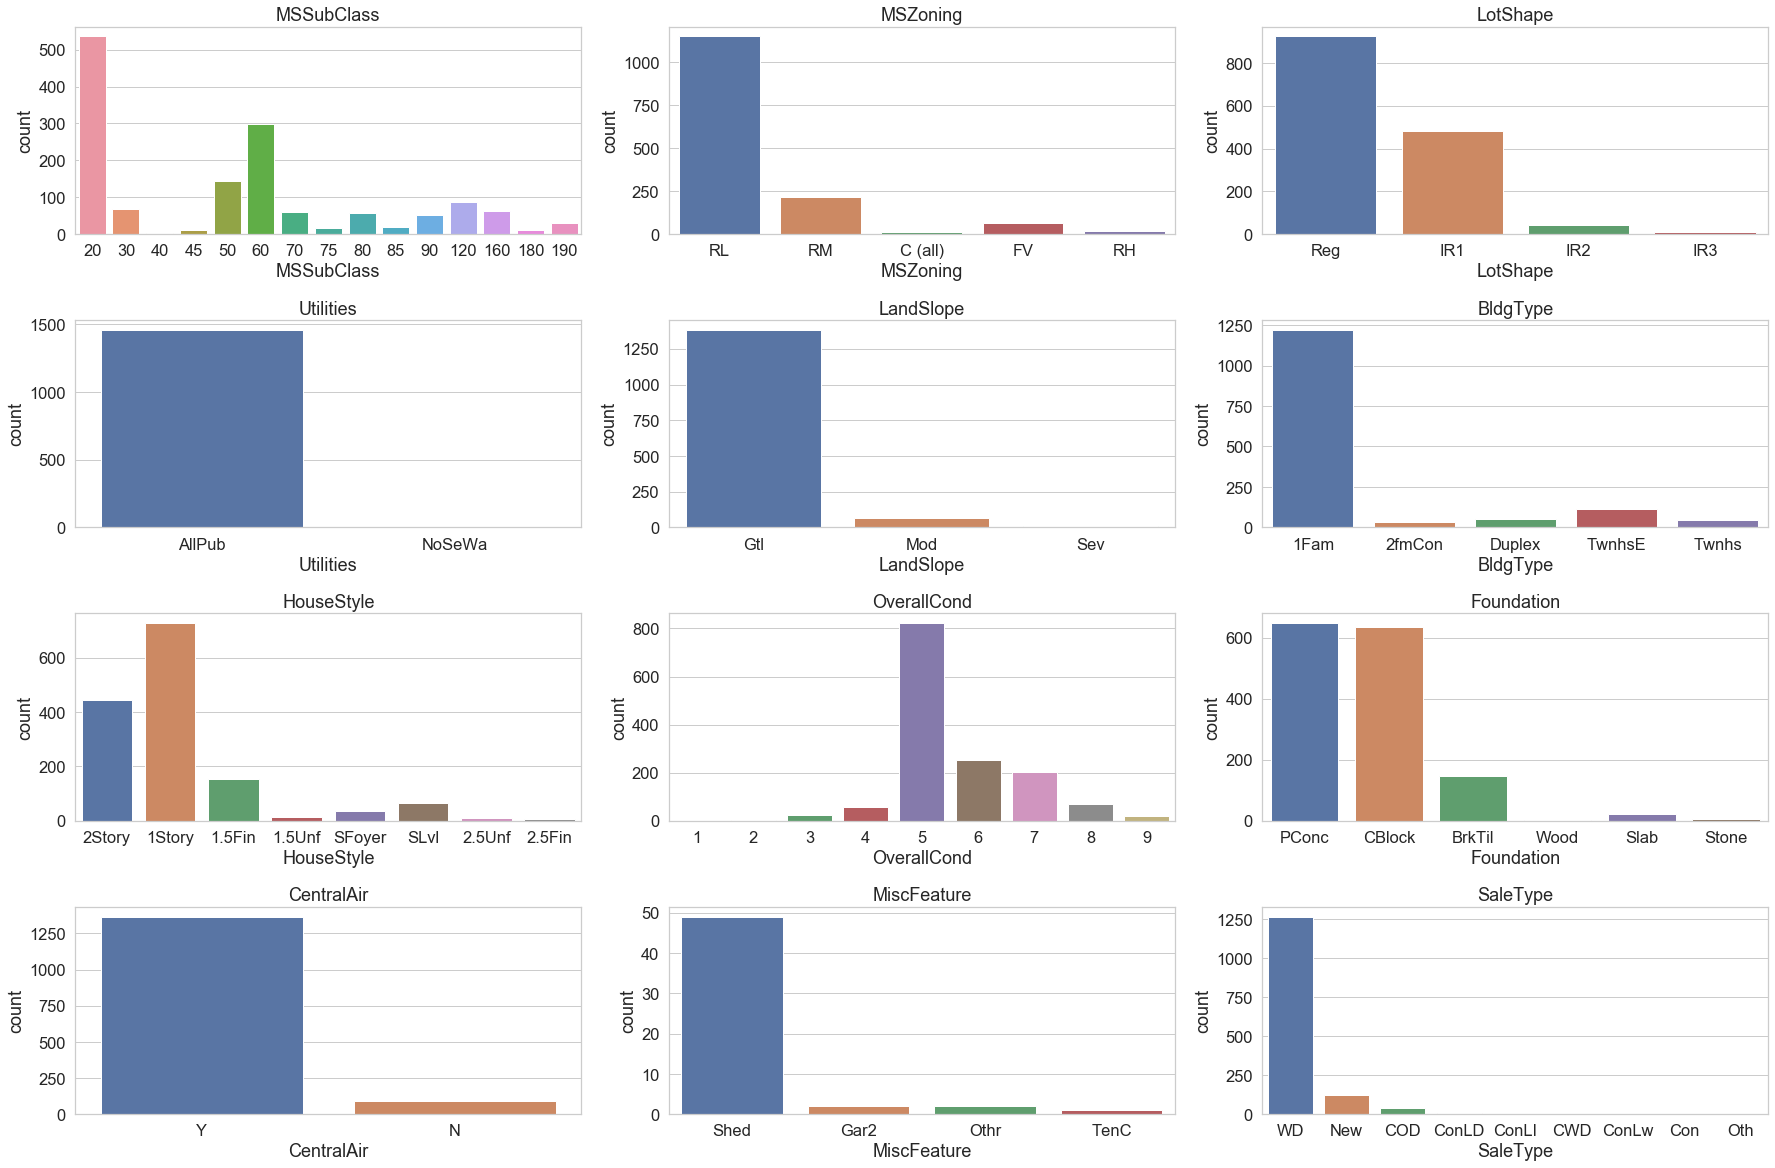

In [1281]:
#Plotting categorical variables for data understanding

sns.set(font_scale=1.5)
sns.set_style("whitegrid") 
plt.figure(figsize = (25,20))

plt.subplot(5, 3, 1)
plt.title('MSSubClass')
sns.countplot(house_price['MSSubClass'])
plt.tight_layout()

plt.subplot(5, 3, 2)
plt.title('MSZoning')
sns.countplot(house_price['MSZoning'])
plt.tight_layout()

plt.subplot(5, 3, 3)
plt.title('LotShape')
sns.countplot(house_price['LotShape'])
plt.tight_layout()

plt.subplot(5, 3, 4)
plt.title('Utilities')
sns.countplot(house_price['Utilities'])
plt.tight_layout()

plt.subplot(5, 3, 5)
plt.title('LandSlope')
sns.countplot(house_price['LandSlope'])
plt.tight_layout()

plt.subplot(5, 3, 6)
plt.title('BldgType')
sns.countplot(house_price['BldgType'])
plt.tight_layout()

plt.subplot(5, 3, 7)
plt.title('HouseStyle')
sns.countplot(house_price['HouseStyle'])
plt.tight_layout()

plt.subplot(5, 3, 8)
plt.title('OverallCond')
sns.countplot(house_price['OverallCond'])
plt.tight_layout()

plt.subplot(5, 3, 9)
plt.title('Foundation')
sns.countplot(house_price['Foundation'])
plt.tight_layout()

plt.subplot(5, 3, 10)
plt.title('CentralAir')
sns.countplot(house_price['CentralAir'])
plt.tight_layout()

plt.subplot(5, 3, 11)
plt.title('MiscFeature')
sns.countplot(house_price['MiscFeature'])
plt.tight_layout()

plt.subplot(5, 3, 12)
plt.title('SaleType')
sns.countplot(house_price['SaleType'])
plt.tight_layout()


#### Insights from univariate analysis on categorical data
- Most of the houses belong to '1-STORY 1946 & NEWER ALL STYLES' type of dwelling
- Most of the sales are from Residential Low Density zones
- Most of the houses are 'Regular' in shape
- All the houses have all public utilities
- Most of the properties have gentle slope
- House style for most of the houses is 1-Story
- Overall condition is mostly 'average'
- Poured Contrete and Cinder Block are the most common types of foundation
- Most of the houses have central air-conditioning
- 'Warranty Deed - Conventional' is the most common type of sale

In [1282]:
house_price_numeric=house_price.select_dtypes(include=['float64','int64'])
house_price_numeric=house_price_numeric.drop(['Id'],axis=1)
house_price_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [1283]:
#Correlation Matrix
cor=house_price_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

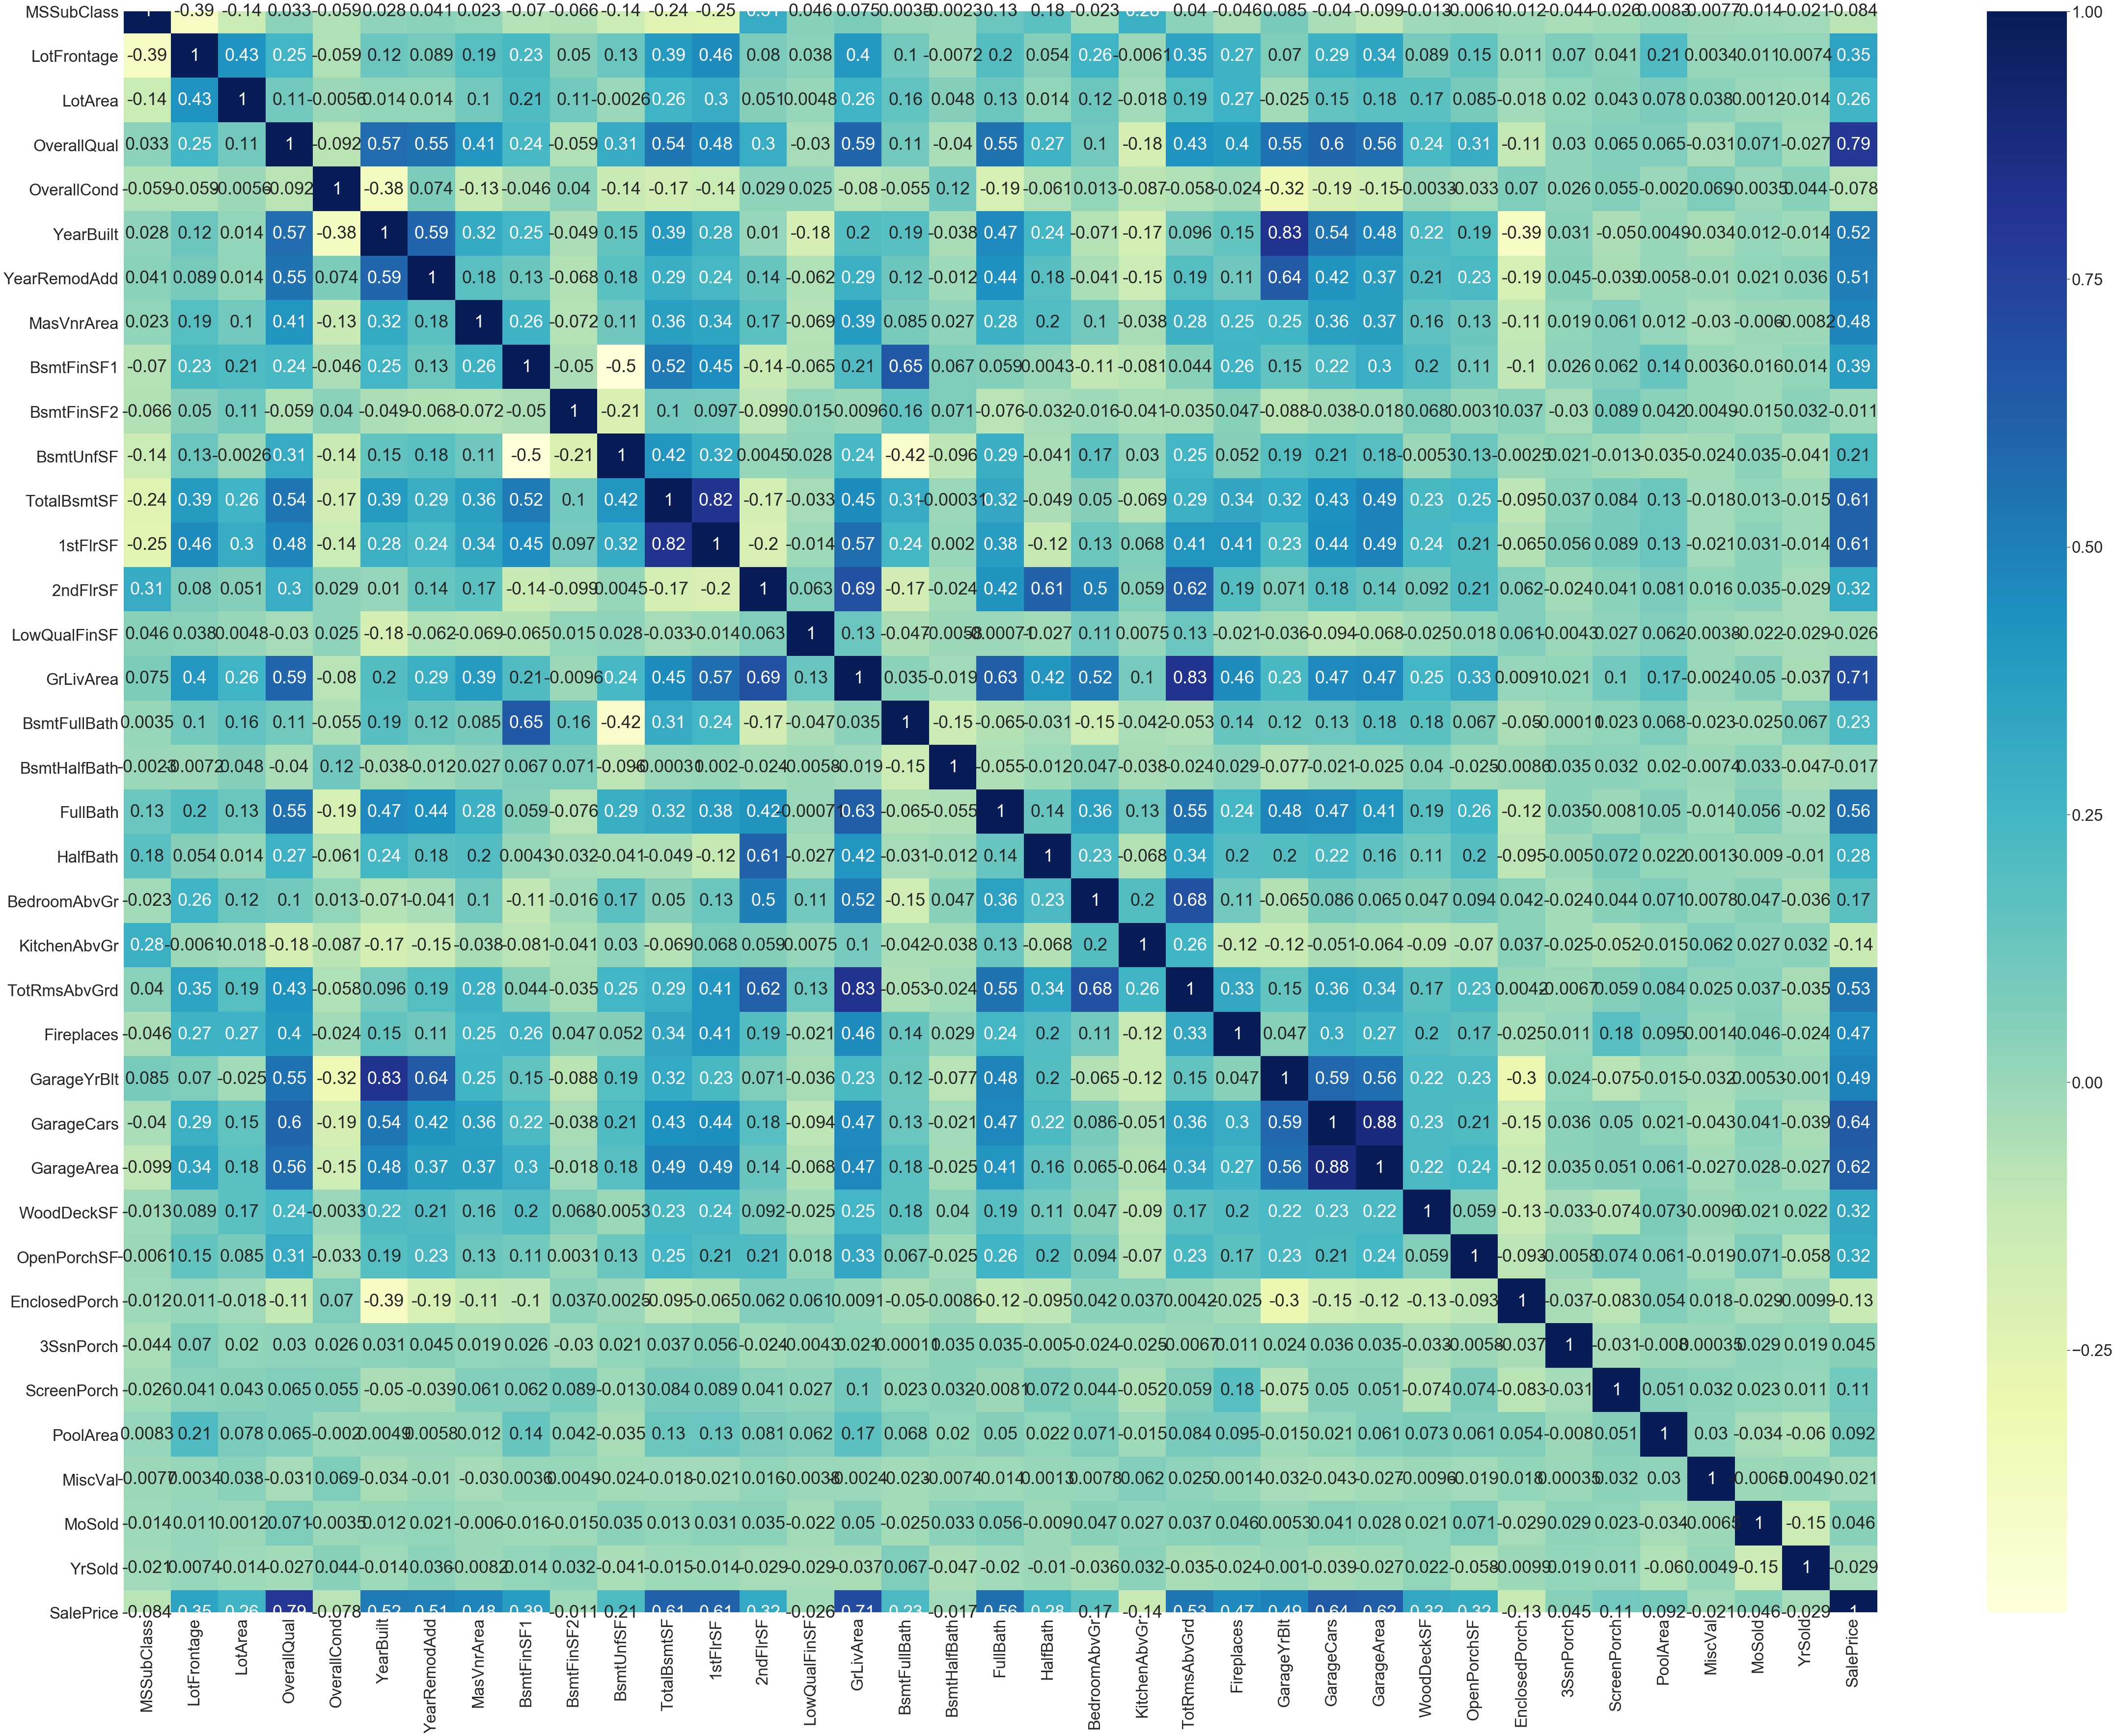

In [1284]:
# Plotting the heatmap for correlation matrix

# Figure size
plt.figure(figsize=(80,60))
sns.set(font_scale=3)
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Insights that can be drawn from the heatmap are:

Correlation of SalePrice with independent variables:
- SalePrice is highly (positively) correlated with OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
- Price is negatively correlated to KitchenAbvGr, EnclosedPorch 

Correlation among independent variables:
- Many independent variables are highly positively correlated: GarageYrBlt & YearBuilt,1stFlrSF & TotalBsmtSF, TotRmsAbvGrd & GrLivArea, GarageArea & GarageCars
- Negatively correlated: BsmtUnfSF & BsmtFinSF1, BsmtUnfSF & BsmtFullBath

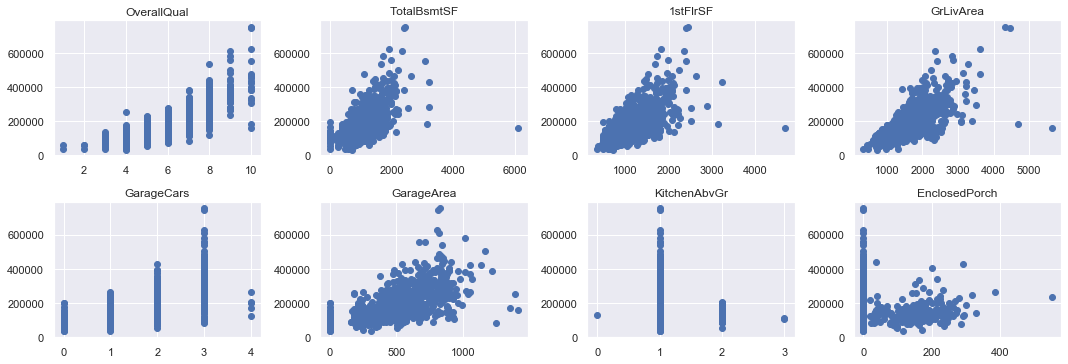

In [1285]:
# Scatter plot for bivariate analysis

plt.figure(figsize = (15,10))
sns.set(font_scale=1)

plt.subplot(4, 4, 1)
plt.title('OverallQual')
plt.scatter(house_price.OverallQual, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 2)
plt.title('TotalBsmtSF')
plt.scatter(house_price.TotalBsmtSF, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 3)
plt.title('1stFlrSF')
plt.scatter(house_price['1stFlrSF'], house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 4)
plt.title('GrLivArea')
plt.scatter(house_price.GrLivArea, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 5)
plt.title('GarageCars')
plt.scatter(house_price.GarageCars, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 6)
plt.title('GarageArea')
plt.scatter(house_price.GarageArea, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 7)
plt.title('KitchenAbvGr')
plt.scatter(house_price.KitchenAbvGr, house_price.SalePrice)
plt.tight_layout()

plt.subplot(4, 4, 8)
plt.title('EnclosedPorch')
plt.scatter(house_price.EnclosedPorch, house_price.SalePrice)
plt.tight_layout()

### Insights:
- SalePrice increases with increase in: OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
- SalePrice decreases with increase in: KitchenAbvGr, EnclosedPorch 

## 2. Data Cleaning

In [1286]:
round(house_price.isnull().sum()/len(house_price),4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1287]:
# Dropping variables with more than 40% of missing values

house_price=house_price.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [1288]:
round(house_price.isnull().sum()/len(house_price),4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [1289]:
#Removing observations with 2 or more than 2 missing values
house_price=house_price[house_price.isnull().sum(axis=1) < 2]

In [1290]:
# Removing the rows which contain missing values, since removing few rows would not affect the analysis

house_price=house_price[~house_price['BsmtExposure'].isnull()>=1]
house_price=house_price[~house_price['BsmtFinType2'].isnull()>=1]
house_price=house_price[~house_price['Electrical'].isnull()>=1]

In [1291]:
# Missing value treatmeant for the variable LotFrontage. Replacing the missing value with mean
house_price['LotFrontage']=house_price['LotFrontage'].fillna(house_price['LotFrontage'].mean())

In [1292]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotFrontage      1338 non-null float64
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non

In [1293]:
# Checking for the unique values in different columns
house_price.nunique()

Id               1338
MSSubClass         15
MSZoning            5
LotFrontage       108
LotArea          1000
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual         9
OverallCond         8
YearBuilt         109
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        16
MasVnrType          4
MasVnrArea        325
ExterQual           4
ExterCond           4
Foundation          5
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        621
BsmtFinType2        6
BsmtFinSF2        141
BsmtUnfSF         764
TotalBsmtSF       700
Heating             4
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          727
2ndFlrSF          394
LowQualFinSF       16
GrLivArea 

## 3. Data Preparation

In [1294]:
# Checking for the highly skewed variables
for i in house_price.select_dtypes(include=['object']):
    print(round(house_price[i].value_counts()/len(house_price),4)*100)

RL         79.67
RM         14.28
FV          4.63
RH          0.82
C (all)     0.60
Name: MSZoning, dtype: float64
Pave    99.63
Grvl     0.37
Name: Street, dtype: float64
Reg    61.96
IR1    34.30
IR2     2.99
IR3     0.75
Name: LotShape, dtype: float64
Lvl    90.13
Bnk     3.89
HLS     3.59
Low     2.39
Name: LandContour, dtype: float64
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
Inside     71.52
Corner     18.24
CulDSac     6.73
FR2         3.21
FR3         0.30
Name: LotConfig, dtype: float64
Gtl    94.54
Mod     4.56
Sev     0.90
Name: LandSlope, dtype: float64
NAmes      15.62
CollgCr    10.91
OldTown     7.47
Somerst     6.20
Gilbert     5.75
NridgHt     5.61
NWAmes      5.46
Edwards     5.23
Sawyer      5.16
SawyerW     3.96
Crawfor     3.74
BrkSide     3.51
Mitchel     3.14
NoRidge     3.06
Timber      2.77
IDOTRR      2.17
ClearCr     1.94
StoneBr     1.87
SWISU       1.49
Blmngtn     1.27
BrDale      1.12
MeadowV     0.90
Veenker     0.82
NPkVill     0.6

In [1295]:
# Some of the categorical variables are highly skewed, hence it is better to drop these from our analysis 

house_price=house_price.drop(['Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond',
                'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],axis=1)
house_price=house_price.reset_index(drop=True)

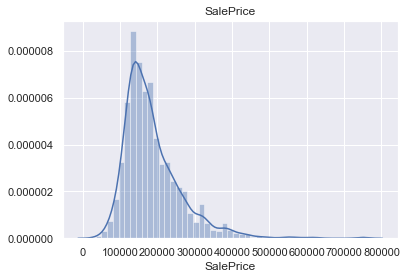

In [1297]:
# We can see the distribution of our target variable is positively skewed because of the presence of outliers 
# Since our best fit line would be affected if the distribution is not near normal, hence we have to use transformation
sns.set(font_scale=1)
plt.title('SalePrice')
sns.distplot(house_price['SalePrice'])

In [1298]:
#Applying log transformation to the target variable
house_price['SalePrice_transformed']=np.log(house_price['SalePrice'])

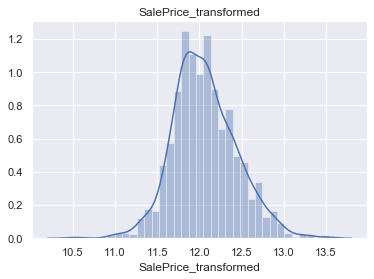

In [1299]:
#Plotting the transformed target variable
sns.set(font_scale=1)
plt.title('SalePrice_transformed')
sns.distplot(house_price['SalePrice_transformed'])

In [1300]:
# Treating year columns in the data
house_price['years_diff_sold_built']=house_price['YrSold']-house_price['YearBuilt']
house_price['years_diff_remodadd_built']=house_price['YearRemodAdd']-house_price['YearBuilt']
house_price['years_diff_garage_built']=house_price['GarageYrBlt']-house_price['YearBuilt']

In [1301]:
house_price=house_price.drop(['Id','SalePrice','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [1302]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3,random_state = 100)

In [1303]:
# Performing feature engineering hacks to the train data
# Mean encoding technique is used for all the features
# Features which contain information of similar type are grouped and collectively replaced by the mean encoded values

mean_encode=df_train.groupby(['MSSubClass','MSZoning'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MS_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['MSSubClass','MSZoning'],right_on=['MSSubClass','MSZoning'],how='left')
df_train=df_train.drop(['MSSubClass','MSZoning'],axis=1)

mean_encode=df_train.groupby(['LotFrontage','LotArea','LotShape','LotConfig'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Lot_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['LotFrontage','LotArea','LotShape','LotConfig'],right_on=['LotFrontage','LotArea','LotShape','LotConfig'],how='left')
df_train=df_train.drop(['LotFrontage','LotArea','LotShape','LotConfig'],axis=1)

mean_encode=df_train.groupby(['Exterior1st','Exterior2nd','ExterQual','ExterCond'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Exter_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['Exterior1st','Exterior2nd','ExterQual','ExterCond'],right_on=['Exterior1st','Exterior2nd','ExterQual','ExterCond'],how='left')
df_train=df_train.drop(['Exterior1st','Exterior2nd','ExterQual','ExterCond'],axis=1)

mean_encode=df_train.groupby(['MasVnrType','MasVnrArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MasVnr_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['MasVnrType','MasVnrArea'],right_on=['MasVnrType','MasVnrArea'],how='left')
df_train=df_train.drop(['MasVnrType','MasVnrArea'],axis=1)

mean_encode=df_train.groupby(['BsmtQual','BsmtExposure','TotalBsmtSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Bsmt_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['BsmtQual','BsmtExposure','TotalBsmtSF'],right_on=['BsmtQual','BsmtExposure','TotalBsmtSF'],how='left')
df_train=df_train.drop(['BsmtQual','BsmtExposure','TotalBsmtSF'],axis=1)

mean_encode=df_train.groupby(['BsmtFinType1','BsmtFinSF1'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtFinType1_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['BsmtFinType1','BsmtFinSF1'],right_on=['BsmtFinType1','BsmtFinSF1'],how='left')
df_train=df_train.drop(['BsmtFinType1','BsmtFinSF1'],axis=1)

mean_encode=df_train.groupby(['BsmtFinType2','BsmtFinSF2'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtFinType2_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['BsmtFinType2','BsmtFinSF2'],right_on=['BsmtFinType2','BsmtFinSF2'],how='left')
df_train=df_train.drop(['BsmtFinType2','BsmtFinSF2'],axis=1)

mean_encode=df_train.groupby(['BsmtUnfSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtUnfSF_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['BsmtUnfSF'],right_on=['BsmtUnfSF'],how='left')
df_train=df_train.drop(['BsmtUnfSF'],axis=1)

mean_encode=df_train.groupby(['Neighborhood','Condition1'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Neighbrhd_cond1_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['Neighborhood','Condition1'],right_on=['Neighborhood','Condition1'],how='left')
df_train=df_train.drop(['Neighborhood','Condition1'],axis=1)

mean_encode=df_train.groupby(['BldgType','HouseStyle'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Bldgtype_House_style_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['BldgType','HouseStyle'],right_on=['BldgType','HouseStyle'],how='left')
df_train=df_train.drop(['BldgType','HouseStyle'],axis=1)

mean_encode=df_train.groupby(['RoofStyle'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'RoofStyle_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['RoofStyle'],right_on=['RoofStyle'],how='left')
df_train=df_train.drop(['RoofStyle'],axis=1)

mean_encode=df_train.groupby(['Foundation'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Foundation_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['Foundation'],right_on=['Foundation'],how='left')
df_train=df_train.drop(['Foundation'],axis=1)

mean_encode=df_train.groupby(['HeatingQC'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'HeatingQC_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['HeatingQC'],right_on=['HeatingQC'],how='left')
df_train=df_train.drop(['HeatingQC'],axis=1)

mean_encode=df_train.groupby(['KitchenAbvGr','KitchenQual'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Kitchen_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['KitchenAbvGr','KitchenQual'],right_on=['KitchenAbvGr','KitchenQual'],how='left')
df_train=df_train.drop(['KitchenAbvGr','KitchenQual'],axis=1)

mean_encode=df_train.groupby(['GarageType','GarageFinish','GarageCars','GarageArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Garage_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['GarageType','GarageFinish','GarageCars','GarageArea'],right_on=['GarageType','GarageFinish','GarageCars','GarageArea'],how='left')
df_train=df_train.drop(['GarageType','GarageFinish','GarageCars','GarageArea'],axis=1)

mean_encode=df_train.groupby(['MoSold'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MoSold_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['MoSold'],right_on=['MoSold'],how='left')
df_train=df_train.drop(['MoSold'],axis=1)

mean_encode=df_train.groupby(['SaleType','SaleCondition'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'SaleType_SaleCondition_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['SaleType','SaleCondition'],right_on=['SaleType','SaleCondition'],how='left')
df_train=df_train.drop(['SaleType','SaleCondition'],axis=1)

mean_encode=df_train.groupby(['2ndFlrSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'2ndFlrSF_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['2ndFlrSF'],right_on=['2ndFlrSF'],how='left')
df_train=df_train.drop(['2ndFlrSF'],axis=1)

mean_encode=df_train.groupby(['LowQualFinSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'LowQualFinSF_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['LowQualFinSF'],right_on=['LowQualFinSF'],how='left')
df_train=df_train.drop(['LowQualFinSF'],axis=1)

mean_encode=df_train.groupby(['WoodDeckSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'WoodDeckSF_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['WoodDeckSF'],right_on=['WoodDeckSF'],how='left')
df_train=df_train.drop(['WoodDeckSF'],axis=1)

mean_encode=df_train.groupby(['3SsnPorch'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'3SsnPorch_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['3SsnPorch'],right_on=['3SsnPorch'],how='left')
df_train=df_train.drop(['3SsnPorch'],axis=1)

mean_encode=df_train.groupby(['ScreenPorch'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'ScreenPorch_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['ScreenPorch'],right_on=['ScreenPorch'],how='left')
df_train=df_train.drop(['ScreenPorch'],axis=1)

mean_encode=df_train.groupby(['PoolArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'PoolArea_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['PoolArea'],right_on=['PoolArea'],how='left')
df_train=df_train.drop(['PoolArea'],axis=1)

mean_encode=df_train.groupby(['MiscVal'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MiscVal_mean_encoded'})
df_train=pd.merge(df_train,mean_encode,left_on=['MiscVal'],right_on=['MiscVal'],how='left')
df_train=df_train.drop(['MiscVal'],axis=1)

df_train.head()

OverallQual  OverallCond  1stFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0            6            7      1096       1991             0             0   
1            6            6       864        864             1             0   
2            6            5      1362       1362             1             0   
3            7            5      1153       2031             0             0   
4            5            7      1040       1040             0             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  OpenPorchSF  \
0         1         1             3             7           1            0   
1         1         0             2             4           0            0   
2         1         1             3             6           1           20   
3         2         1             3             8           1           84   
4         2         0             3             5           0            0   

   EnclosedPorch  SalePrice_transformed  years_diff_sold_built  \
0             19              12.301383                     75   
1              0              11.695247                     47   
2              0              12.001505                     47   
3              0              12.312682                     10   
4              0              11.921718                     32   

   years_diff_remodadd_built  years_diff_garage_built  MS_mean_encoded  \
0                         18                     45.0        11.940085   
1                          0                      0.0        12.072065   
2                          0                      0.0        12.072065   
3                          1                      0.0        12.339004   
4                         31                      0.0        12.072065   

   Lot_mean_encoded  Exter_mean_encoded  MasVnr_mean_encoded  \
0         12.301383           11.816683            12.228081   
1         11.695247           11.706091            11.695247   
2         12.001505           11.706091            12.001505   
3         12.312682           12.318206            12.312682   
4         11.921718           11.882252            11.943465   

   Bsmt_mean_encoded  BsmtFinType1_mean_encoded  BsmtFinType2_mean_encoded  \
0          12.301383                  12.480855                  12.301383   
1          11.686383                  11.695247                  12.066370   
2          12.001505                  12.001505                  11.939537   
3          12.312682                  12.312682                  12.066370   
4          11.921718                  11.921718                  11.921718   

   BsmtUnfSF_mean_encoded  Neighbrhd_cond1_mean_encoded  \
0               11.943170                     12.170668   
1               11.695247                     11.889638   
2               11.954868                     11.889638   
3               11.950821                     12.148540   
4               12.132592                     12.148540   

   Bldgtype_House_style_mean_encoded  RoofStyle_mean_encoded  \
0                          11.858767               12.023578   
1                          12.012997               12.023578   
2                          12.012997               12.023578   
3                          12.285215               12.023578   
4                          12.012997               12.023578   

   Foundation_mean_encoded  HeatingQC_mean_encoded  Kitchen_mean_encoded  \
0                11.892603               11.833637             11.843966   
1                11.892603               12.213305             12.221955   
2                11.892603               11.833637             11.843966   
3                12.263057               12.213305             12.221955   
4                11.892603               11.833637             12.221955   

   Garage_mean_encoded  MoSold_mean_encoded  \
0            12.152976            12.038184   
1            11.721514            12.031433   
2            11.867

In [1304]:
# Performing similar feature engineering hacks to the test data
# Mean encoding technique is used for all the features
# Features which contain information of similar type are grouped and collectively replaced by the mean encoded values

mean_encode=df_test.groupby(['MSSubClass','MSZoning'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MS_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['MSSubClass','MSZoning'],right_on=['MSSubClass','MSZoning'],how='left')
df_test=df_test.drop(['MSSubClass','MSZoning'],axis=1)

mean_encode=df_test.groupby(['LotFrontage','LotArea','LotShape','LotConfig'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Lot_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['LotFrontage','LotArea','LotShape','LotConfig'],right_on=['LotFrontage','LotArea','LotShape','LotConfig'],how='left')
df_test=df_test.drop(['LotFrontage','LotArea','LotShape','LotConfig'],axis=1)

mean_encode=df_test.groupby(['Exterior1st','Exterior2nd','ExterQual','ExterCond'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Exter_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['Exterior1st','Exterior2nd','ExterQual','ExterCond'],right_on=['Exterior1st','Exterior2nd','ExterQual','ExterCond'],how='left')
df_test=df_test.drop(['Exterior1st','Exterior2nd','ExterQual','ExterCond'],axis=1)

mean_encode=df_test.groupby(['MasVnrType','MasVnrArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MasVnr_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['MasVnrType','MasVnrArea'],right_on=['MasVnrType','MasVnrArea'],how='left')
df_test=df_test.drop(['MasVnrType','MasVnrArea'],axis=1)

mean_encode=df_test.groupby(['BsmtQual','BsmtExposure','TotalBsmtSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Bsmt_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['BsmtQual','BsmtExposure','TotalBsmtSF'],right_on=['BsmtQual','BsmtExposure','TotalBsmtSF'],how='left')
df_test=df_test.drop(['BsmtQual','BsmtExposure','TotalBsmtSF'],axis=1)

mean_encode=df_test.groupby(['BsmtFinType1','BsmtFinSF1'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtFinType1_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['BsmtFinType1','BsmtFinSF1'],right_on=['BsmtFinType1','BsmtFinSF1'],how='left')
df_test=df_test.drop(['BsmtFinType1','BsmtFinSF1'],axis=1)

mean_encode=df_test.groupby(['BsmtFinType2','BsmtFinSF2'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtFinType2_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['BsmtFinType2','BsmtFinSF2'],right_on=['BsmtFinType2','BsmtFinSF2'],how='left')
df_test=df_test.drop(['BsmtFinType2','BsmtFinSF2'],axis=1)

mean_encode=df_test.groupby(['BsmtUnfSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'BsmtUnfSF_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['BsmtUnfSF'],right_on=['BsmtUnfSF'],how='left')
df_test=df_test.drop(['BsmtUnfSF'],axis=1)

mean_encode=df_test.groupby(['Neighborhood','Condition1'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Neighbrhd_cond1_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['Neighborhood','Condition1'],right_on=['Neighborhood','Condition1'],how='left')
df_test=df_test.drop(['Neighborhood','Condition1'],axis=1)

mean_encode=df_test.groupby(['BldgType','HouseStyle'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Bldgtype_House_style_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['BldgType','HouseStyle'],right_on=['BldgType','HouseStyle'],how='left')
df_test=df_test.drop(['BldgType','HouseStyle'],axis=1)

mean_encode=df_test.groupby(['RoofStyle'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'RoofStyle_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['RoofStyle'],right_on=['RoofStyle'],how='left')
df_test=df_test.drop(['RoofStyle'],axis=1)

mean_encode=df_test.groupby(['Foundation'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Foundation_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['Foundation'],right_on=['Foundation'],how='left')
df_test=df_test.drop(['Foundation'],axis=1)

mean_encode=df_test.groupby(['HeatingQC'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'HeatingQC_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['HeatingQC'],right_on=['HeatingQC'],how='left')
df_test=df_test.drop(['HeatingQC'],axis=1)

mean_encode=df_test.groupby(['KitchenAbvGr','KitchenQual'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Kitchen_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['KitchenAbvGr','KitchenQual'],right_on=['KitchenAbvGr','KitchenQual'],how='left')
df_test=df_test.drop(['KitchenAbvGr','KitchenQual'],axis=1)

mean_encode=df_test.groupby(['GarageType','GarageFinish','GarageCars','GarageArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'Garage_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['GarageType','GarageFinish','GarageCars','GarageArea'],right_on=['GarageType','GarageFinish','GarageCars','GarageArea'],how='left')
df_test=df_test.drop(['GarageType','GarageFinish','GarageCars','GarageArea'],axis=1)

mean_encode=df_test.groupby(['MoSold'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MoSold_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['MoSold'],right_on=['MoSold'],how='left')
df_test=df_test.drop(['MoSold'],axis=1)

mean_encode=df_test.groupby(['SaleType','SaleCondition'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'SaleType_SaleCondition_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['SaleType','SaleCondition'],right_on=['SaleType','SaleCondition'],how='left')
df_test=df_test.drop(['SaleType','SaleCondition'],axis=1)

mean_encode=df_test.groupby(['2ndFlrSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'2ndFlrSF_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['2ndFlrSF'],right_on=['2ndFlrSF'],how='left')
df_test=df_test.drop(['2ndFlrSF'],axis=1)

mean_encode=df_test.groupby(['LowQualFinSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'LowQualFinSF_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['LowQualFinSF'],right_on=['LowQualFinSF'],how='left')
df_test=df_test.drop(['LowQualFinSF'],axis=1)

mean_encode=df_test.groupby(['WoodDeckSF'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'WoodDeckSF_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['WoodDeckSF'],right_on=['WoodDeckSF'],how='left')
df_test=df_test.drop(['WoodDeckSF'],axis=1)

mean_encode=df_test.groupby(['3SsnPorch'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'3SsnPorch_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['3SsnPorch'],right_on=['3SsnPorch'],how='left')
df_test=df_test.drop(['3SsnPorch'],axis=1)

mean_encode=df_test.groupby(['ScreenPorch'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'ScreenPorch_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['ScreenPorch'],right_on=['ScreenPorch'],how='left')
df_test=df_test.drop(['ScreenPorch'],axis=1)

mean_encode=df_test.groupby(['PoolArea'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'PoolArea_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['PoolArea'],right_on=['PoolArea'],how='left')
df_test=df_test.drop(['PoolArea'],axis=1)

mean_encode=df_test.groupby(['MiscVal'], as_index=False)['SalePrice_transformed'].mean().rename(columns={'SalePrice_transformed':'MiscVal_mean_encoded'})
df_test=pd.merge(df_test,mean_encode,left_on=['MiscVal'],right_on=['MiscVal'],how='left')
df_test=df_test.drop(['MiscVal'],axis=1)

df_test.head()


OverallQual  OverallCond  1stFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0            5            6       912        912             1             0   
1            5            6      1619       1786             2             0   
2            7            5       764       1626             1             0   
3            9            5      1709       1709             1             0   
4            6            7      2158       2158             1             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  OpenPorchSF  \
0         1         0             2             4           0            0   
1         2         0             3             7           2            0   
2         2         1             2             6           0           27   
3         2         0             2             5           1           65   
4         2         0             4             7           1           29   

   EnclosedPorch  SalePrice_transformed  years_diff_sold_built  \
0              0              11.877569                     46   
1              0              12.341259                     43   
2              0              11.944708                      5   
3              0              12.703509                      9   
4             39              12.400817                     57   

   years_diff_remodadd_built  years_diff_garage_built  MS_mean_encoded  \
0                          0                      0.0        12.133546   
1                          0                      0.0        11.715060   
2                          1                      0.0        12.011779   
3                          1                      0.0        12.703509   
4                         51                      0.0        12.133546   

   Lot_mean_encoded  Exter_mean_encoded  MasVnr_mean_encoded  \
0         11.877569           11.895035            11.945977   
1         12.341259           12.129938            11.945977   
2         11.944708           11.944708            11.944708   
3         12.703509           12.340011            12.108217   
4         12.400817           12.115916            11.945977   

   Bsmt_mean_encoded  BsmtFinType1_mean_encoded  BsmtFinType2_mean_encoded  \
0          11.884922                  11.877569                  12.090148   
1          12.341259                  12.341259                  12.341259   
2          11.944708                  11.944708                  12.090148   
3          12.703509                  12.703509                  12.090148   
4          12.400817                  12.400817                  12.090148   

   BsmtUnfSF_mean_encoded  Neighbrhd_cond1_mean_encoded  \
0               11.877569                     11.861336   
1               12.341259                     12.410262   
2               11.944708                     12.571998   
3               12.108217                     12.332736   
4               12.400817                     11.760234   

   Bldgtype_House_style_mean_encoded  RoofStyle_mean_encoded  \
0                          12.070343               12.297574   
1                          11.877515               12.023828   
2                          11.720002               12.023828   
3                          12.207357               12.023828   
4                          12.070343               12.023828   

   Foundation_mean_encoded  HeatingQC_mean_encoded  Kitchen_mean_encoded  \
0                11.919810               11.866280             11.856487   
1                11.919810               12.268275             11.856487   
2                12.309658               12.268275             12.256539   
3                12.309658               12.268275             12.256539   
4                11.919810               11.866280             12.256539   

   Garage_mean_encoded  MoSold_mean_encoded  \
0            11.739285            12.135119   
1            12.386396            12.072511   
2            11.944

In [1305]:
# Fitting and performing scaling to the train data 
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df_train[var]=Scaler.fit_transform(df_train[var])
df_train.head()

OverallQual  OverallCond  1stFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        0.500     0.714286  0.224163   0.360105           0.0           0.0   
1        0.500     0.571429  0.139738   0.091516           0.5           0.0   
2        0.500     0.428571  0.320961   0.210200           0.5           0.0   
3        0.625     0.428571  0.244905   0.369638           0.0           0.0   
4        0.375     0.714286  0.203785   0.133460           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  OpenPorchSF  \
0  0.333333       0.5      0.500000      0.444444    0.333333     0.000000   
1  0.333333       0.0      0.333333      0.111111    0.000000     0.000000   
2  0.333333       0.5      0.500000      0.333333    0.333333     0.049261   
3  0.666667       0.5      0.500000      0.555556    0.333333     0.206897   
4  0.666667       0.0      0.500000      0.222222    0.000000     0.000000   

   EnclosedPorch  SalePrice_transformed  years_diff_sold_built  \
0       0.057576               0.597361               0.590551   
1       0.000000               0.399441               0.370079   
2       0.000000               0.499443               0.370079   
3       0.000000               0.601051               0.078740   
4       0.000000               0.473390               0.251969   

   years_diff_remodadd_built  years_diff_garage_built  MS_mean_encoded  \
0                   0.166667                 0.474138         0.721301   
1                   0.000000                 0.086207         0.798221   
2                   0.000000                 0.086207         0.798221   
3                   0.009259                 0.086207         0.953797   
4                   0.287037                 0.086207         0.798221   

   Lot_mean_encoded  Exter_mean_encoded  MasVnr_mean_encoded  \
0          0.517889            0.226220             0.409919   
1          0.280904            0.176404             0.169244   
2          0.400644            0.176404             0.307578   
3          0.522307            0.452132             0.448132   
4          0.369449            0.255756             0.281361   

   Bsmt_mean_encoded  BsmtFinType1_mean_encoded  BsmtFinType2_mean_encoded  \
0           0.597361                   0.588059                   0.752082   
1           0.396547                   0.280904                   0.566221   
2           0.499443                   0.400644                   0.465915   
3           0.601051                   0.522307                   0.566221   
4           0.473390                   0.369449                   0.451823   

   BsmtUnfSF_mean_encoded  Neighbrhd_cond1_mean_encoded  \
0                0.480395                      0.535861   
1                0.399441                      0.346912   
2                0.484215                      0.346912   
3                0.482893                      0.520983   
4                0.542247                      0.520983   

   Bldgtype_House_style_mean_encoded  RoofStyle_mean_encoded  \
0                           0.538032                0.362482   
1                           0.705108                0.362482   
2                           0.705108                0.362482   
3                           1.000000                0.362482   
4                           0.705108                0.362482   

   Foundation_mean_encoded  HeatingQC_mean_encoded  Kitchen_mean_encoded  \
0                 0.240237                0.547821              0.333820   
1                 0.240237                1.000000              0.646449   
2                 0.240237                0.547821              0.333820   
3                 1.000000                1.000000              0.646449   
4                 0.240237                0.547821              0.646449   

   Garage_mean_encoded  MoSold_mean_encoded  \
0             0.468959             0.247167   
1             0.303108             0.205048   
2             0.359

In [1306]:
# Using the scaler which is fitted on train data to scale test data
df_test[var]=Scaler.transform(df_test[var])
df_test=df_test.reset_index(drop=True)
df_test.head()

OverallQual  OverallCond  1stFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        0.375     0.571429  0.157205   0.102955           0.5           0.0   
1        0.375     0.571429  0.414483   0.311249           1.0           0.0   
2        0.625     0.428571  0.103348   0.273117           0.5           0.0   
3        0.875     0.428571  0.447234   0.292898           0.5           0.0   
4        0.500     0.714286  0.610626   0.399905           0.5           0.0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  OpenPorchSF  \
0  0.333333       0.0      0.333333      0.111111    0.000000     0.000000   
1  0.666667       0.0      0.500000      0.444444    0.666667     0.000000   
2  0.666667       0.5      0.333333      0.333333    0.000000     0.066502   
3  0.666667       0.0      0.333333      0.222222    0.333333     0.160099   
4  0.666667       0.0      0.666667      0.444444    0.333333     0.071429   

   EnclosedPorch  SalePrice_transformed  years_diff_sold_built  \
0       0.000000               0.458974               0.362205   
1       0.000000               0.610382               0.338583   
2       0.000000               0.480897               0.039370   
3       0.000000               0.728667               0.070866   
4       0.118182               0.629829               0.448819   

   years_diff_remodadd_built  years_diff_garage_built  MS_mean_encoded  \
0                   0.000000                 0.086207         0.834053   
1                   0.000000                 0.086207         0.590154   
2                   0.009259                 0.086207         0.763085   
3                   0.009259                 0.086207         1.166235   
4                   0.472222                 0.086207         0.834053   

   Lot_mean_encoded  Exter_mean_encoded  MasVnr_mean_encoded  \
0          0.352187            0.261514             0.282496   
1          0.533480            0.367326             0.282496   
2          0.378437            0.283889             0.281923   
3          0.675112            0.461954             0.355778   
4          0.556766            0.361010             0.282496   

   Bsmt_mean_encoded  BsmtFinType1_mean_encoded  BsmtFinType2_mean_encoded  \
0           0.461375                   0.352187                   0.585026   
1           0.610382                   0.533480                   0.783618   
2           0.480897                   0.378437                   0.585026   
3           0.728667                   0.675112                   0.585026   
4           0.629829                   0.556766                   0.585026   

   BsmtUnfSF_mean_encoded  Neighbrhd_cond1_mean_encoded  \
0                0.458974                      0.327883   
1                0.610382                      0.696951   
2                0.480897                      0.805693   
3                0.534287                      0.644826   
4                0.629829                      0.259908   

   Bldgtype_House_style_mean_encoded  RoofStyle_mean_encoded  \
0                           0.767231                1.293052   
1                           0.558342                0.363333   
2                           0.387709                0.363333   
3                           0.915657                0.363333   
4                           0.767231                0.363333   

   Foundation_mean_encoded  HeatingQC_mean_encoded  Kitchen_mean_encoded  \
0                 0.296037                0.586699              0.344176   
1                 0.296037                1.065468              0.344176   
2                 1.095574                1.065468              0.675052   
3                 1.095574                1.065468              0.675052   
4                 0.296037                0.586699              0.675052   

   Garage_mean_encoded  MoSold_mean_encoded  \
0             0.309939             0.851900   
1             0.558685             0.461322   
2             0.388

In [1307]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('SalePrice_transformed')
X_train = df_train

y_test = df_test.pop('SalePrice_transformed')
X_test = df_test

## 4. Model Building and Evaluation

### Ridge

In [1308]:
# Starting with Ridge regression

# list of alphas to tune
params = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1309]:
# Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.037599      0.066702         0.002616        0.001218       1e-05   
1       0.004607      0.000801         0.001590        0.000484      0.0001   
2       0.006401      0.004800         0.002004        0.000636       0.001   
3       0.004600      0.000797         0.001401        0.000495        0.01   
4       0.003597      0.000492         0.001599        0.000800         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.011870          -0.010517          -0.010453   
1  {'alpha': 0.0001}          -0.011870          -0.010517          -0.010453   
2   {'alpha': 0.001}          -0.011869          -0.010519          -0.010456   
3    {'alpha': 0.01}          -0.011866          -0.010531          -0.010484   
4     {'alpha': 0.1}          -0.011902          -0.010691          -0.010752   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.010607          -0.013034        -0.011297        0.001014   
1          -0.010607          -0.013033        -0.011297        0.001013   
2          -0.010608          -0.013024        -0.011296        0.001010   
3          -0.010617          -0.012954        -0.011291        0.000977   
4          -0.010751          -0.012748        -0.011369        0.000825   

   rank_test_score  split0_train_score  split1_train_score  \
0                4           -0.009980           -0.010699   
1                3           -0.009980           -0.010699   
2                2           -0.009981           -0.010701   
3                1           -0.009992           -0.010716   
4                5           -0.010127           -0.010869   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.010304           -0.010386           -0.010326   
1           -0.010305           -0.010386           -0.010326   
2           -0.010307           -0.010388           -0.010327   
3           -0.010329           -0.010404           -0.010342   
4           -0.010557           -0.010592           -0.010548   

   mean_train_score  std_train_score  
0         -0.010339         0.000229  
1         -0.010339         0.000229  
2         -0.010341         0.000229  
3         -0.010357         0.000230  
4         -0.010538         0.000238

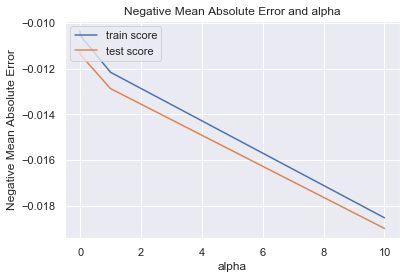

In [1310]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
sns.set(font_scale=1)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

 Based on the cross validation results and the above graph, choosing alpha=0.01 as the optimal alpha for Ridge regression 

In [1314]:
# Evaluating MSE and R2 score
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.015479201875934675
0.9835435087459076
0.01401873419440423
0.9880125936324786


The test and train r2 scores are quite high and are close to each other indicating good fit

In [1315]:
# Listing down the coefficients obtained from Ridge regression
rr.coef_

array([ 2.29504237e-02,  3.06431526e-02,  7.96713131e-03,  2.84130065e-02,
        6.65623738e-03,  3.18473440e-03, -2.18883714e-04,  1.64173363e-03,
        4.26047287e-03,  3.42216713e-03,  6.20177588e-03,  3.43710277e-04,
       -1.30159647e-03, -5.16864365e-03,  1.41477226e-03,  2.45439212e-03,
        4.69781659e-02,  2.96417936e-01, -1.17978890e-02, -3.67933560e-03,
        4.02850816e-01,  4.85025859e-02,  4.71506931e-03,  6.61487441e-02,
        7.84077093e-04, -1.34759538e-02, -2.14715734e-03,  5.21965096e-03,
        3.65817763e-03, -2.44045430e-03,  7.91422021e-02,  2.40240862e-03,
        7.34513298e-03,  1.31586207e-03,  1.44111600e-02, -3.63682263e-03,
       -4.60931320e-03,  9.18553842e-03,  4.46173385e-03,  3.47381290e-03])

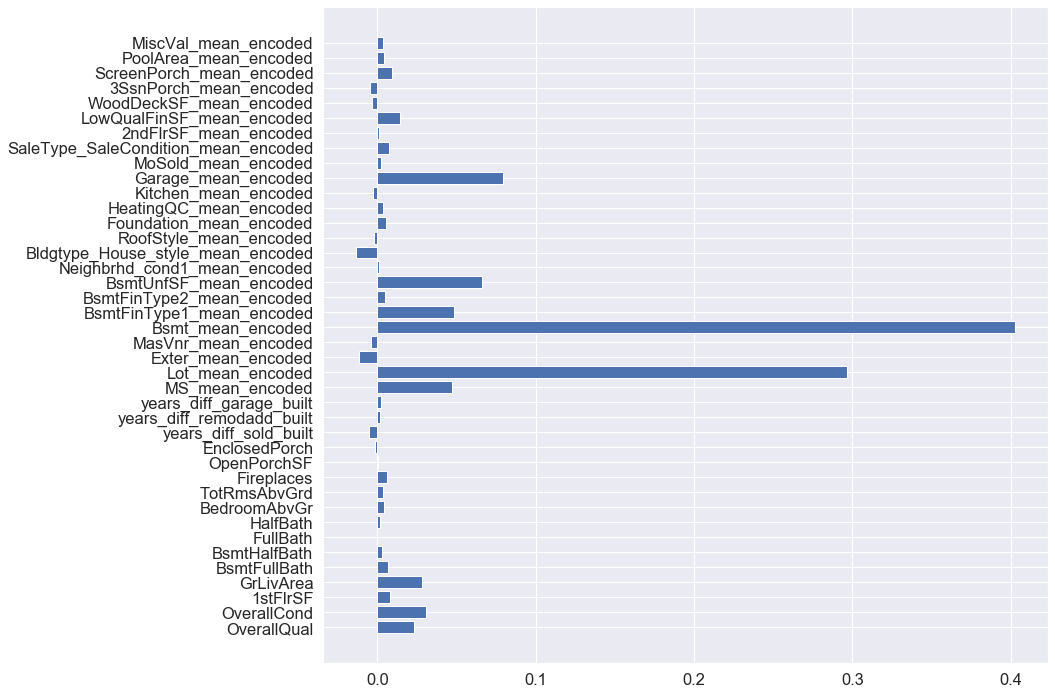

In [1317]:
# Looking at the feature importance based on Ridge regression results
importance = rr.coef_

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.barh( range(len(importance)), importance)
plt.yticks(range(len(importance)),X_train.columns)
#plt.xlabel('x-axis', fontsize=40)
plt.tight_layout()
plt.show()

#### Based on Ridge Regression, the top 10 predictors are:
1. Bsmt_mean_encoded-This is a feature derived using basement height, exposure and area 
2. Lot_mean_encoded- This is a feature derived using lot area, shape, config and street connectivity
3. Garage_mean_encoded - This is a feature derived using garage size, location and interior finish
4. BsmtUnfSF_mean_encoded- This is a feature derived using unfinished basement area in square feet
5. BsmtFinType1_mean_encoded- This is a feature derived using basement finished area and its rating
6. MS_mean_encoded- This is a feature derived using type of dwelling and general zoning classification of the sale
7. OverllCond- Rating of the overall condition of the house
8. GrLivArea- Above grade (ground) living area in square feet
9. OverallQual- Rating of the overall material and finish of the house
10. LowQualFinSf_mean_encoded- This is a feature derived using finished area of low quality (all floors)

### Lasso

In [1318]:
# Now performing Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1320]:
# Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.035994      0.052757         0.003601        0.002799       1e-05   
1       0.011810      0.003192         0.002589        0.001342      0.0001   
2       0.008396      0.002417         0.003003        0.000892       0.001   
3       0.006399      0.006343         0.001799        0.000745        0.01   
4       0.005000      0.000629         0.001601        0.000491         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.011607          -0.010388          -0.010371   
1  {'alpha': 0.0001}          -0.011117          -0.009812          -0.010209   
2   {'alpha': 0.001}          -0.013344          -0.010855          -0.011845   
3    {'alpha': 0.01}          -0.061705          -0.054223          -0.059101   
4     {'alpha': 0.1}          -0.098269          -0.090382          -0.093779   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.010483          -0.012261        -0.011023        0.000774   
1          -0.010132          -0.011171        -0.010489        0.000552   
2          -0.011041          -0.011744        -0.011768        0.000879   
3          -0.055143          -0.059542        -0.057947        0.002820   
4          -0.091890          -0.094203        -0.093709        0.002664   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.009894           -0.010649   
1                1           -0.009719           -0.010472   
2                3           -0.011493           -0.011801   
3                4           -0.057778           -0.057534   
4                5           -0.092206           -0.094519   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.010290           -0.010338           -0.010304   
1           -0.010153           -0.010130           -0.010089   
2           -0.011726           -0.011142           -0.011404   
3           -0.057301           -0.057974           -0.057809   
4           -0.093397           -0.093793           -0.093571   

   mean_train_score  std_train_score  
0         -0.010295         0.000240  
1         -0.010112         0.000239  
2         -0.011513         0.000236  
3         -0.057679         0.000236  
4         -0.093497         0.000750

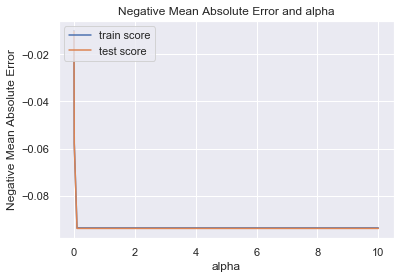

In [1321]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
sns.set(font_scale=1)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

 Based on the cross validation results and the above graph, choosing alpha=0.0001 as the optimal alpha for Lasso regression 

In [1322]:
# Evaluating MSE and R2 score
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.015745025306703995
0.9829734428348094
0.01321117344943454
0.9893539031114641


The test and train r2 scores are quite high and are close to each other indicating good fit

In [1325]:
# Listing down the coefficients obtained from Ridge regression
model_lasso.coef_

array([ 0.01869065,  0.02495278,  0.00430077,  0.01899553,  0.00442861,
        0.        ,  0.000472  ,  0.00081283,  0.        ,  0.0062356 ,
        0.00615487,  0.        , -0.        , -0.00099111, -0.        ,
       -0.        ,  0.03277994,  0.3181766 ,  0.        ,  0.        ,
        0.40389911,  0.03742235,  0.        ,  0.05431331,  0.        ,
       -0.00093726, -0.        ,  0.00509573,  0.00125066,  0.        ,
        0.07252592,  0.00135597,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])

It can be observed that for many independent variables the coefficient is 0, this is because Lasso also helps in feature selection

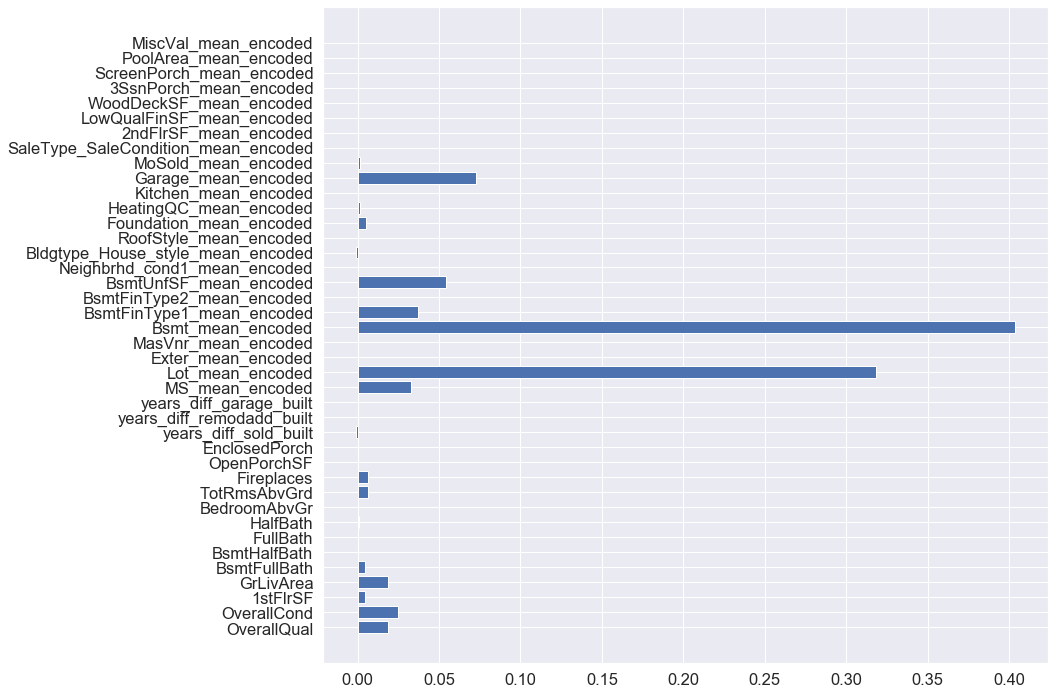

In [1326]:
# Looking at the feature importance based on Lasso regression results
importance = model_lasso.coef_

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)),X_train.columns)
#plt.xlabel('x-axis', fontsize=40)
plt.tight_layout()
plt.show()

#### Based on Lasso Regression, the top 10 predictors are:
1. Bsmt_mean_encoded-This is a feature derived using basement height, exposure and area 
2. Lot_mean_encoded- This is a feature derived using lot area, shape, config and street connectivity
3. Garage_mean_encoded - This is a feature derived using garage size, location and interior finish
4. BsmtUnfSF_mean_encoded- This is a feature derived using unfinished basement area in square feet
5. BsmtFinType1_mean_encoded- This is a feature derived using basement finished area and its rating
6. MS_mean_encoded- This is a feature derived using type of dwelling and general zoning classification of the sale
7. OverllCond- Rating of the overall condition of the house
8. GrLivArea- Above grade (ground) living area in square feet
9. OverallQual- Rating of the overall material and finish of the house
10. Fireplaces- Number of fireplaces

### Solution of the Part 1 of the assignment ends here

#### For Subjective question 3 (Part II)

In [1335]:
# If we remove the top 5 predictors and run lasso regression
X_train_sq3=X_train.drop(['Bsmt_mean_encoded','Lot_mean_encoded','Garage_mean_encoded'
                          ,'BsmtUnfSF_mean_encoded','BsmtFinType1_mean_encoded'],axis=1)

X_test_sq3=X_test.drop(['Bsmt_mean_encoded','Lot_mean_encoded','Garage_mean_encoded'
                        ,'BsmtUnfSF_mean_encoded','BsmtFinType1_mean_encoded'], axis=1)

In [1336]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_sq3, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1337]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.038395      0.013870         0.005002        0.006516       1e-05   
1       0.030798      0.019681         0.002200        0.000400      0.0001   
2       0.004396      0.001351         0.002000        0.000897       0.001   
3       0.003198      0.000980         0.001602        0.000802        0.01   
4       0.021000      0.013740         0.002006        0.000641         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.026968          -0.026066          -0.030107   
1  {'alpha': 0.0001}          -0.027021          -0.025826          -0.030249   
2   {'alpha': 0.001}          -0.030308          -0.029471          -0.031161   
3    {'alpha': 0.01}          -0.071381          -0.063451          -0.068365   
4     {'alpha': 0.1}          -0.098269          -0.090382          -0.093779   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.026266          -0.027742        -0.027429        0.001462   
1          -0.026135          -0.027178        -0.027282        0.001569   
2          -0.028090          -0.030387        -0.029884        0.001044   
3          -0.066579          -0.068682        -0.067695        0.002619   
4          -0.091890          -0.094203        -0.093709        0.002664   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.025730           -0.025883   
1                1           -0.026018           -0.026270   
2                3           -0.029322           -0.029431   
3                4           -0.067173           -0.067146   
4                5           -0.092206           -0.094519   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.024512           -0.026183           -0.025956   
1           -0.024697           -0.026412           -0.026199   
2           -0.027961           -0.029342           -0.029489   
3           -0.067266           -0.067525           -0.067341   
4           -0.093397           -0.093793           -0.093571   

   mean_train_score  std_train_score  
0         -0.025653         0.000589  
1         -0.025919         0.000624  
2         -0.029109         0.000577  
3         -0.067290         0.000136  
4         -0.093497         0.000750

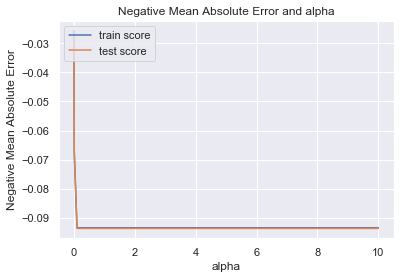

In [1338]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
sns.set(font_scale=1)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1339]:
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train_sq3, y_train) 
pred_train_lasso= model_lasso.predict(X_train_sq3)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test_sq3)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.036386723491205544
0.9090660584989814
0.04572057077408273
0.8724939146583366


In [1340]:
model_lasso.coef_

array([ 0.11837205,  0.09899622,  0.13803109,  0.13771593,  0.03580253,
        0.00262038,  0.00977839,  0.00948003,  0.        ,  0.02514207,
        0.03791989,  0.00740986,  0.00693165, -0.0319598 ,  0.        ,
        0.        ,  0.12677449,  0.03391002,  0.12777621,  0.01890704,
        0.08188147, -0.01909995, -0.00694223,  0.01547214,  0.02104085,
        0.02273135,  0.00651306,  0.06029968,  0.10570116,  0.        ,
        0.03342984,  0.02254897,  0.04455549,  0.        ,  0.        ])

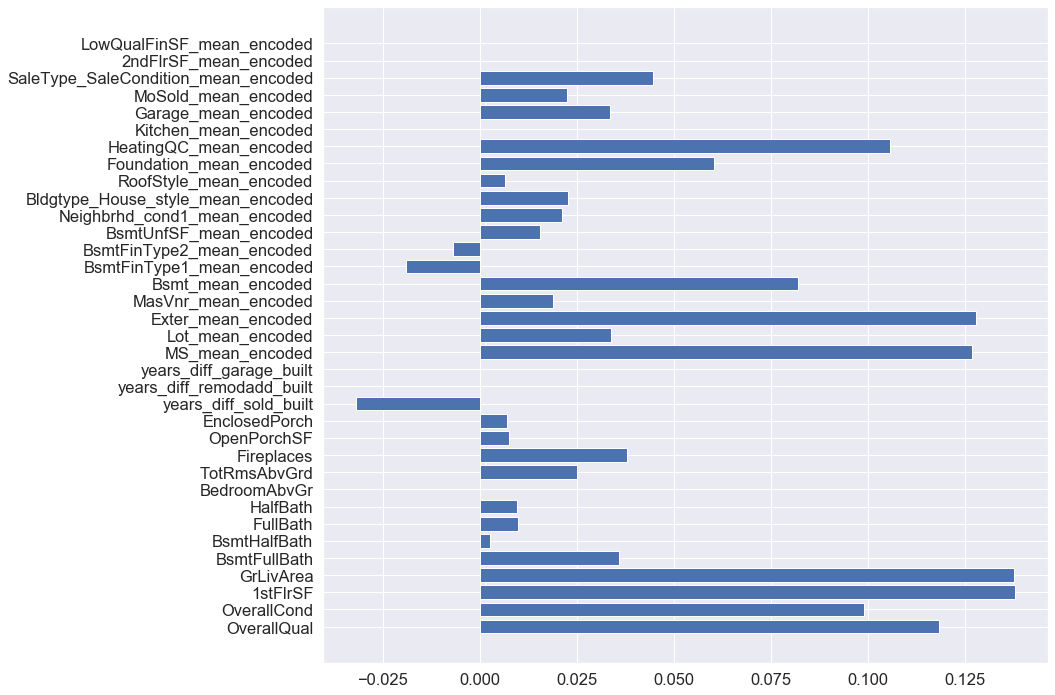

Feature: 0, Score: 0.11837
Feature: 1, Score: 0.09900
Feature: 2, Score: 0.13803
Feature: 3, Score: 0.13772
Feature: 4, Score: 0.03580
Feature: 5, Score: 0.00262
Feature: 6, Score: 0.00978
Feature: 7, Score: 0.00948
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02514
Feature: 10, Score: 0.03792
Feature: 11, Score: 0.00741
Feature: 12, Score: 0.00693
Feature: 13, Score: -0.03196
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.12677
Feature: 17, Score: 0.03391
Feature: 18, Score: 0.12778
Feature: 19, Score: 0.01891
Feature: 20, Score: 0.08188
Feature: 21, Score: -0.01910
Feature: 22, Score: -0.00694
Feature: 23, Score: 0.01547
Feature: 24, Score: 0.02104
Feature: 25, Score: 0.02273
Feature: 26, Score: 0.00651
Feature: 27, Score: 0.06030
Feature: 28, Score: 0.10570
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.03343
Feature: 31, Score: 0.02255
Feature: 32, Score: 0.04456
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000


In [1341]:
importance = model_lasso.coef_

sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)),X_train.columns)
#plt.xlabel('x-axis', fontsize=40)
plt.tight_layout()
plt.show()

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance